In [4]:
import numpy as np
def sort_by_target(mnist):
    reorder_train=np.array(sorted([(target, i)for i,target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test=np.array(sorted([(target,i)for i, target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000]=mnist.target[reorder_train]
    mnist.data[60000:]=mnist.data[reorder_test+60000]
    mnist.target[60000:]=mnist.target[reorder_test+60000]
try:
    from sklearn.datasets import fetch_openml
    mnist=fetch_openml("mnist_784",version=1,cache=True)
    mnist.target=mnist.target.astype(np.int8)
    sort_by_target(mnist)

except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist=fetch_mldata("MNIST original")
mnist["data"],mnist["target"] 

mnist.data.shape
X,y=mnist["data"],mnist["target"]

X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
param_grid=[
    {"weights":["uniform","distance"],
    "n_neighbors":[3,4,5]}
]
grid_search=GridSearchCV(knn_clf,param_grid,cv=5,verbose=3, n_jobs=-1)##モデルにはverbose入れたほうがいい、　n_jobsでフル回転
grid_search.fit(X_train,y_train)
grid_search_pred=grid_search.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(grid_search_pred,y_test))
#T_sum=np.sum(grid_search_pred==y_test)
#print(T_sum/70000)




    

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 239.8min finished


0.9714


In [6]:
import numpy as np
def sort_by_target(mnist):
    reorder_train=np.array(sorted([(target, i)for i,target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test=np.array(sorted([(target,i)for i, target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000]=mnist.target[reorder_train]
    mnist.data[60000:]=mnist.data[reorder_test+60000]
    mnist.target[60000:]=mnist.target[reorder_test+60000]
try:
    from sklearn.datasets import fetch_openml
    mnist=fetch_openml("mnist_784",version=1,cache=True)
    mnist.target=mnist.target.astype(np.int8)
    sort_by_target(mnist)

except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist=fetch_mldata("MNIST original")
mnist["data"],mnist["target"] 

mnist.data.shape
X,y=mnist["data"],mnist["target"]

X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

from scipy.ndimage.interpolation import shift

def shift_image(image, dx,dy):
    image=image.reshape((28,28))
    shifted_image=shift(image,[dy,dx],cval=0,mode="constant")
    return shifted_image.reshape([-1])

X_train_augmented=[image for image in X_train]
y_train_augmented=[label for label in y_train]

for dx, dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image, label in zip(X_train,y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)
        
X_train_augmented=np.array(X_train_augmented)
y_train_augmented=np.array(y_train_augmented)




    

Saving figure some_digit_plot


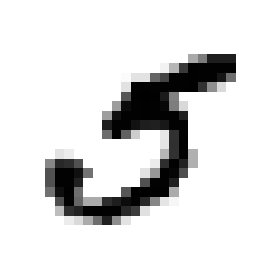

0.7187227359972082


In [ ]:

from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR="."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path=os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID, fig_id+".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format="png",dpi=300)    
    


def sort_by_target(mnist):
    reorder_train=np.array(sorted([(target, i)for i,target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test=np.array(sorted([(target,i)for i, target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000]=mnist.target[reorder_train]
    mnist.data[60000:]=mnist.data[reorder_test+60000]
    mnist.target[60000:]=mnist.target[reorder_test+60000]


                                                                                            
try:
    from sklearn.datasets import fetch_openml
    mnist=fetch_openml("mnist_784",version=1,cache=True)
    mnist.target=mnist.target.astype(np.int8)
    sort_by_target(mnist)

except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist=fetch_mldata("MNIST original")
mnist["data"],mnist["target"] 

mnist.data.shape
X,y=mnist["data"],mnist["target"]
y.shape
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
save_fig("some_digit_plot")
plt.show()

def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")##画像やヒートマップを描画する
    plt.axis("off")##軸ラベル非表示
    

def plot_digits(instances, images_per_row=10, **options):
    size=28
    images_per_row=min(len(instances),images_per_row)
    images=[instance.reshape(size,size) for instance in instances]
    n_rows=(len(instances)-1)//images_per_row+1
    row_imaves=[]
    n_empty=n_rows*images_per_row-len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row:(row + 1)*images_per_row]
        row_imaves.append(np.concatenate(rimages, axis=1))
    image=np.concatenate(rimages,axis=0)
    plt.imshow(image,cmap=mpl.cm.binary, **options)
    plt.axis("off")
                    

X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

from scipy.ndimage.interpolation import shift

def shift_image(image, dx,dy):
    image=image.reshape((28,28))
    shifted_image=shift(image,[dy,dx],cval=0,mode="constant")
    return shifted_image.reshape([-1])

X_train_augmented=[image for image in X_train]
y_train_augmented=[label for label in y_train]

for dx, dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image, label in zip(X_train,y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)
        
X_train_augmented=np.array(X_train_augmented)
y_train_augmented=np.array(y_train_augmented)
y_train_5 = (y_train_augmented==5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5,tol=-np.infty, random_state=0)

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_augmented, y_train_5, cv=3)

from sklearn.metrics import precision_score

print(precision_score(y_train_5, y_train_pred))
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors= 4, weights= 'distance')
knn_clf.fit(X_train_augmented,y_train_augmented)
from sklearn.metrics import accuracy_score
y_pred=knn_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

#0.7187227359972082



[[18, 30.0], [30, 18.0]]